# Downside Risk Measures

## Volatility vs Semi-Deviation

* Semi-Deviation is the bolatility of the sub-sample of below-average or below-zero returns
* volatility or uncertainty does not bother investors when it is on the upside
* Volatility on the downside is the problem.

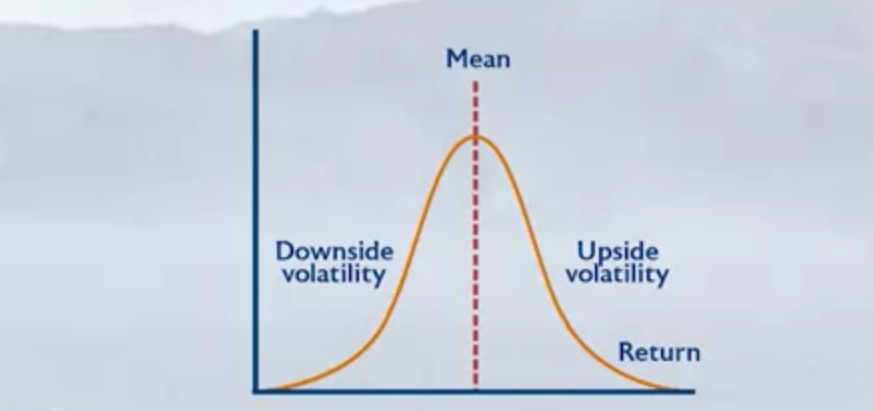

$$\sigma_{semi} = \sqrt{\frac{1}{N}\sum_{R_t \leq \bar{R}}\big(R_t - \bar{R}\big)^2},$$
where $N$ is the number of returns that fall below the mean
* investors are not concerned about gain, but happy about it

## Value at Risk (VaR) - Motivation

* Represents the maximum "expected" loss over a given time period

Definition: It is Maximum potential loss threshold:

* At a pecified confidence level (such as 99%)
* Over a specified hodling period (f.e. 1 Month)

## Distribution Beyond Var

* Expected loss beyond VaR or CVaR
* $&CVAR Expected loss beyond VaR

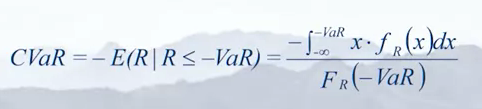


## Estimating VaR

### Methods for Computing VaR

There are at least four standard methods for calculating VaR:

1. Historical (non parametric)
2. Variance-covariance (parametric gaussian)
3. Parametric non gaussian
4. Cornish-Fisher (semi parametric)


### Historical Methodology

Calculation of VaR Based on: 
* the distribution of historical changes 
* in the value of the current portfolio
* under market prices
* over the specified historical observation window

In terms of pros and cons:
* There is no assumptions about the asset return distributions
* no model is used, so there is no model risk
* Your estimate is, however, sensitive to the sample period

### Parametric Gaussian Mehodology

* Calculation of VaR based on portfolio volatility, i.e. On voaltilities and correlations of components
* In assuming a gaussian distribution, you only need to estimate the mean and volatility of the distribution

Gaussian VaR:
* Consider $Z_\apha$ the $\alpha$-Wuantile of the standard normal distribution
    
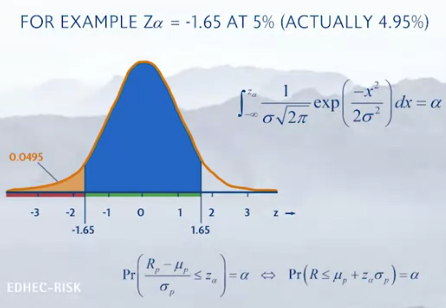

* $VaR_\alpha = - (\mu + z_\alpha\sigma)$

> the problem is, you're taking on a massive amount of more risk simply because you're assuming a Gaussian distribution  and we do know that Gaussian assumption is not a good assumption for asset returns

Assuming normal distributions may understate risk

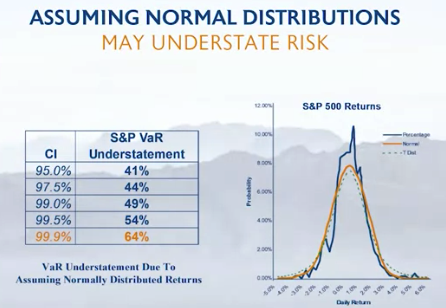

### Parametric Non Gaussian VaR

Instead of using a parametric Gaussian distribution you use one non gaussian distribution such as:

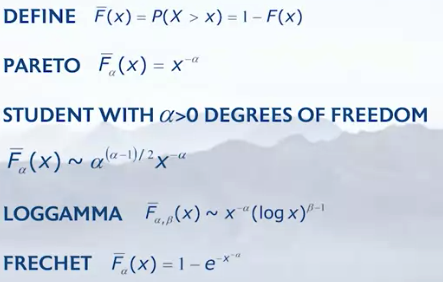


### Cornish-Fisher VaR

* An alternative to parametric exists: Semi-Parametric Approach such as cornish-fisher
* It doesn't force you to assume any particular return distribution
* So what you are doing, is using the Cornish-Fisher expansion

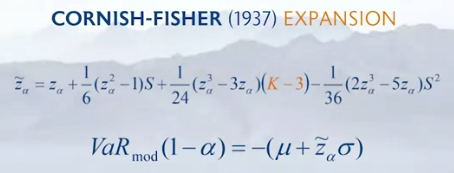

## Wrap-Up

* There exist different methods that can be used to estimate VaR
* A trade-off exists between sample risk and model risk
* A semi-parametric cornish-fisher is often regarded as a cood compromise!

## Lab Session - Semi Deviation, VaR and CVaR


In [32]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hfi = erk.get_hfi_returns()

### Semi Deviation

In [3]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
# since we are interested only on negative std:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [6]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR

Value at Risk:

* Historic VaR
* Parametric VaR - Gaussian
* Modified Cornish-Fisher VaR

In [7]:
import numpy as np

In [8]:
np.percentile(hfi, 5, axis=0)
# How to interpret the results:
# With convertible arbitrage you have 5% chance at any given month to loose 1.5% 

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [12]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [13]:
from scipy.stats import norm

In [14]:
# ppf: Percent point function (inverse of `cdf`) at q of the given RV.
# for a normal distribution what is the z-score associated where half
# of the distribution lies below that?
# Well that would be right at the mean, 
# which could be a z-score of zero
norm.ppf(.5)

0.0

In [16]:
# The z score tells us exactly how far this is from the mean
z = norm.ppf(.05)
z

-1.6448536269514729

In [18]:
# The number we want:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [20]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [27]:
# Cornish-Fisher just adjusts z-score in regard to skeweness and kurtosis
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)

In [28]:
comparison.columns = ["Gaussian", 'Cornish-Fisher', 'Historic']

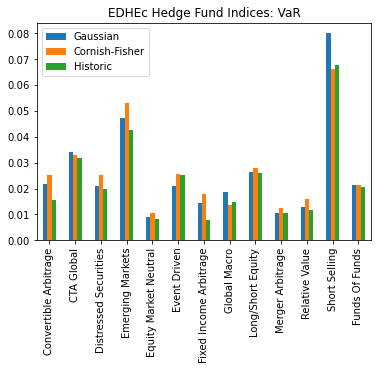

In [31]:
comparison.plot.bar(title="EDHEc Hedge Fund Indices: VaR");

In [34]:
### Beyond VaR aka CVaR

erk.cvar_historic(hfi)

Convertible Arbitrage    -0.001672
CTA Global                0.001510
Distressed Securities    -0.001871
Emerging Markets         -0.001028
Equity Market Neutral    -0.001603
Event Driven             -0.003557
Fixed Income Arbitrage   -0.000380
Global Macro              0.000065
Long/Short Equity        -0.002061
Merger Arbitrage         -0.001469
Relative Value           -0.001211
Short Selling             0.009873
Funds Of Funds           -0.001228
dtype: float64